In [12]:
#Movielens Case Study

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [36]:
df=pd.read_csv('/Users/dcgajjar/Desktop/AI Engineer/Projects/Data/movies.csv',header=None,names=['MovieID','Title','Genres'],sep='::', engine='python')

In [37]:
df

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [38]:
df2=pd.read_csv('/Users/dcgajjar/Desktop/AI Engineer/Projects/Data/ratings.csv',header=None,names=['UserID','MovieID','Rating','Timestamp'],sep='::', engine='python')

In [39]:
df2

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [50]:
df3=pd.read_csv('/Users/dcgajjar/Desktop/AI Engineer/Projects/Data/users.csv',header=None,names=['UserID','Gender','Age','Occupation','Zip-code'],sep='::', engine='python')

In [51]:
df3

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [76]:
#Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation
df4=df3[['UserID','Age','Occupation','Gender']]

In [180]:
df5=df2[['UserID','MovieID']]


In [181]:
df6=df[['MovieID','Title']]


In [182]:
df7=pd.merge(df5,df6,on=['MovieID'])


In [183]:
master_data=pd.merge(df7,df4,on=['UserID'])

In [185]:
master_data.head(1)

,UserID,MovieID,Title,Age,Occupation,Gender
0,1,1193,One Flew Over the Cuckoo's Nest (1975),1,10,F


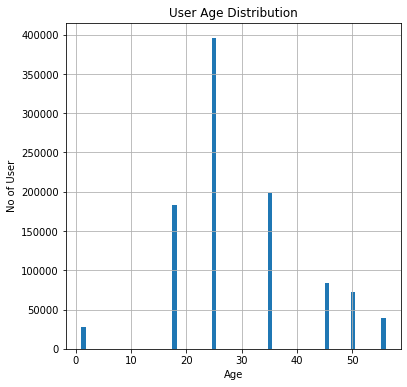

In [176]:
#User Age Distribution
plt.figure(figsize=(6,6))
master_data['Age'].hist(bins=70)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('No of User')
plt.show()

In [166]:
f1=master_data.groupby('Title')


In [167]:
f2=f1.get_group('Toy Story (1995)')


In [168]:
f4=df2.groupby('MovieID')


In [169]:
f5=f4.get_group(1)


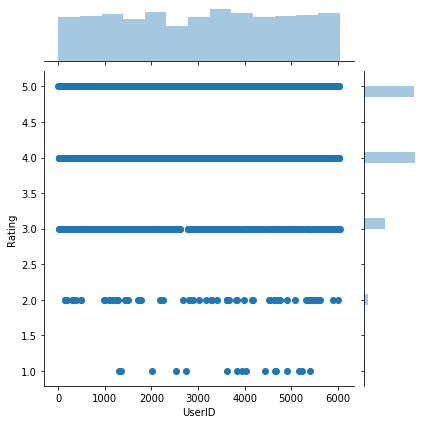

In [170]:
#User rating of the movie “Toy Story”
sns.jointplot(x='UserID',y='Rating',data=f5,kind='scatter')

In [186]:

Newdf=pd.merge(df,df2,on=['MovieID'])
Newdf.head(1)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268


In [151]:
#Top 25 movies by viewership rating
Newdf.sort_values(by='Rating',ascending=False)[['UserID','Title','Rating']].head(25)


,UserID,Title,Rating
0,1,Toy Story (1995),5
657724,101,Rocky II (1979),5
244214,447,Old Yeller (1957),5
657745,549,Rocky II (1979),5
657752,684,Rocky II (1979),5
657764,911,Rocky II (1979),5
657773,1035,Rocky II (1979),5
244200,204,Old Yeller (1957),5
657789,1237,Rocky II (1979),5
657802,1448,Rocky II (1979),5


In [155]:
a=Newdf.groupby('UserID')
a.size()

UserID
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

In [157]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
b=a.get_group(2696)
b

,MovieID,Title,Genres,UserID,Rating,Timestamp
95261,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886
200536,800,Lone Star (1996),Drama|Mystery,2696,5,973308842
270342,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886
274576,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690
349333,1258,"Shining, The (1980)",Horror,2696,4,973308710
360382,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676
448293,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865
457193,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842
459835,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842
464473,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920


In [177]:
Newdf.nunique()

MovieID        3706
Title          3706
Genres          301
UserID         6040
Rating            5
Timestamp    458455
dtype: int64

In [188]:
dff1=pd.merge(df,df2,on=['MovieID'])
dff1.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496


In [200]:
dff2=pd.merge(df3,dff1,on=['UserID'])
dff2.head(3)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Rating,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777


In [203]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   Zip-code    1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Title       1000209 non-null  object
 7   Genres      1000209 non-null  object
 8   Rating      1000209 non-null  int64 
 9   Timestamp   1000209 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [205]:
dff2.drop(['Title','Timestamp'],axis=1,inplace=True)

KeyError: "['Title' 'Timestamp'] not found in axis"

In [234]:
dff2.drop(['Zip-code'],axis=1,inplace=True)

In [235]:
dff2

,UserID,Age,Occupation,MovieID,Rating
0,1,1,10,1,5
1,1,1,10,48,5
2,1,1,10,150,5
3,1,1,10,260,4
4,1,1,10,527,5
...,...,...,...,...,...
1000204,6040,25,6,3683,4
1000205,6040,25,6,3703,4
1000206,6040,25,6,3735,4
1000207,6040,25,6,3751,4


In [209]:
Genres = pd.get_dummies(dff2['Genres'],drop_first=True)
Genres

,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
Gender=pd.get_dummies(df3['Gender'],drop_first=True)
Gender

,M
0,0
1,1
2,1
3,1
4,1
...,...
6035,0
6036,0
6037,0
6038,0


In [237]:
dff2

,UserID,Age,Occupation,MovieID,Rating
0,1,1,10,1,5
1,1,1,10,48,5
2,1,1,10,150,5
3,1,1,10,260,4
4,1,1,10,527,5
...,...,...,...,...,...
1000204,6040,25,6,3683,4
1000205,6040,25,6,3703,4
1000206,6040,25,6,3735,4
1000207,6040,25,6,3751,4


In [220]:
dff2.drop(['Gender','Genres'],axis=1,inplace=True)

In [238]:
dff2

,UserID,Age,Occupation,MovieID,Rating
0,1,1,10,1,5
1,1,1,10,48,5
2,1,1,10,150,5
3,1,1,10,260,4
4,1,1,10,527,5
...,...,...,...,...,...
1000204,6040,25,6,3683,4
1000205,6040,25,6,3703,4
1000206,6040,25,6,3735,4
1000207,6040,25,6,3751,4


In [239]:
FinalDF=pd.concat([dff2,Genres,Gender],axis=1)

In [240]:
FinalDF

,UserID,Age,Occupation,MovieID,Rating,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,...,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western,M
0,1,1,10,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,10,48,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,10,150,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,10,260,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,10,527,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,25,6,3683,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000205,6040,25,6,3703,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000206,6040,25,6,3735,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000207,6040,25,6,3751,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [243]:
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Columns: 306 entries, UserID to M
dtypes: int64(5), uint8(301)
memory usage: 372.9 MB


In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FinalDF.drop('Rating',axis=1), 
                                                    FinalDF['Rating'], test_size=0.30, 
                                                    random_state=101)

In [245]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/dcgajjar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
y_pred=logmodel.predict(X_test)

In [249]:
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [251]:
#Evaluation
from sklearn import metrics

In [252]:
print('Accuracy score:',metrics.accuracy_score(y_test,y_pred))

Accuracy score: 0.34849348303522926
